In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
690,ham,Was the farm open?,NaN,NaN,NaN
1279,ham,Waiting 4 my tv show 2 start lor... U leh stil...,NaN,NaN,NaN
347,ham,One small prestige problem now.,NaN,NaN,NaN
4310,ham,It so happens that there r 2waxsto do wat you ...,NaN,NaN,NaN
2658,ham,Not yet chikku..wat abt u?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Steps:
1. data cleaning
2. EDA 
3. text preprocessing
4. model building
5. Evaluation
6. Improvement
7. website

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
3326,ham,what number do u live at? Is it 11?
3363,ham,"Yo my trip got postponed, you still stocked up?"
1281,ham,Am I the only one who doesn't stalk profiles?
2723,ham,"Tunde, how are you doing. This is just wishing..."
110,ham,What is the plural of the noun research?


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
4399,ham,Juz go google n search 4 qet...
5425,ham,Otherwise had part time job na-tuition..
4378,ham,How are you. Just checking up on you
4814,ham,ÌÏ no home work to do meh...
1308,ham,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.


In [9]:
# encode the target columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# chack missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# chack duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

## 2. EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

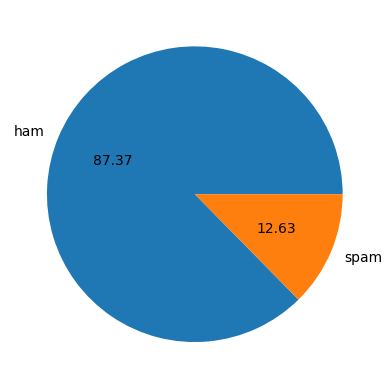

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [17]:
# data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt', quiet=True, force=True)
nltk.download('punkt_tab', quiet=True, force=True)

True

In [20]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# num of words 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# only ham msg
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']]

,num_characters,num_words,num_sentences
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [25]:
# only spam msg
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']]

,num_characters,num_words,num_sentences
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


<Axes: xlabel='num_characters', ylabel='Count'>

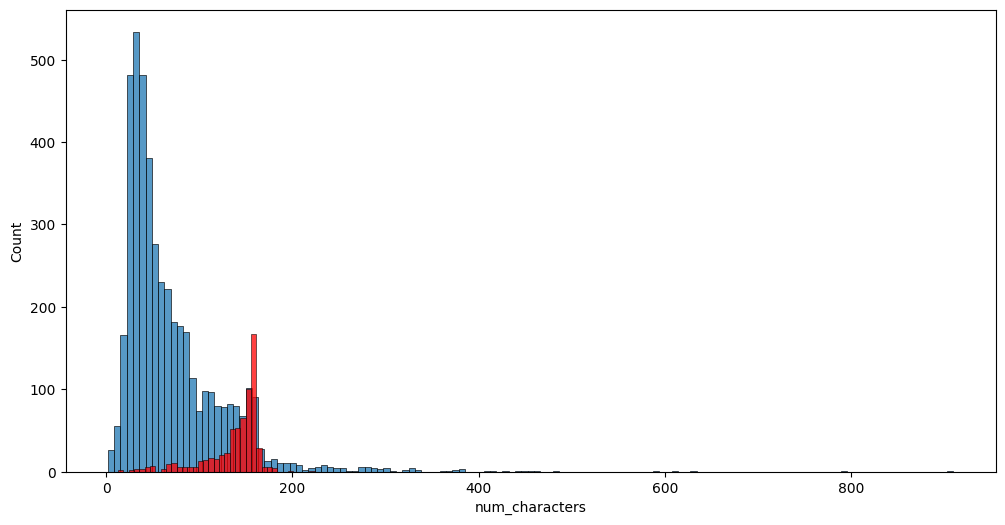

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

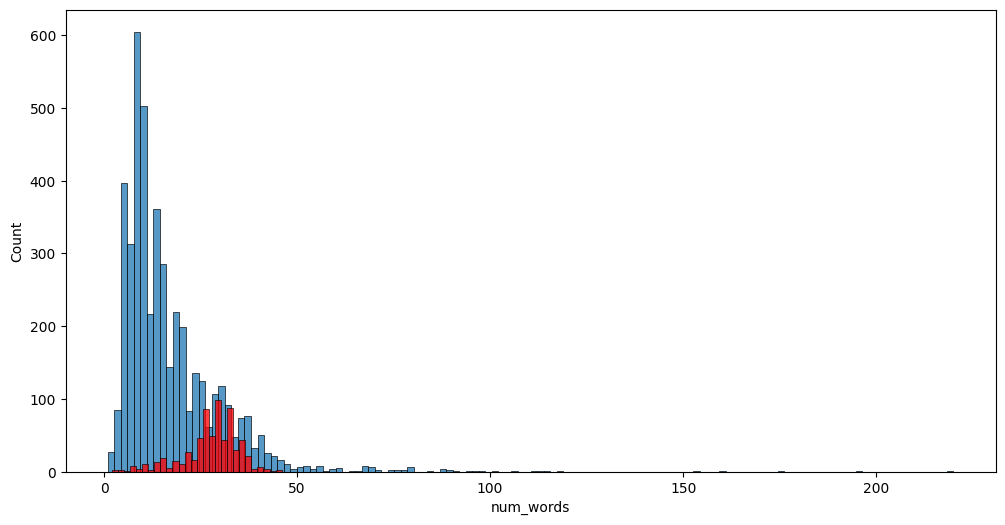

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

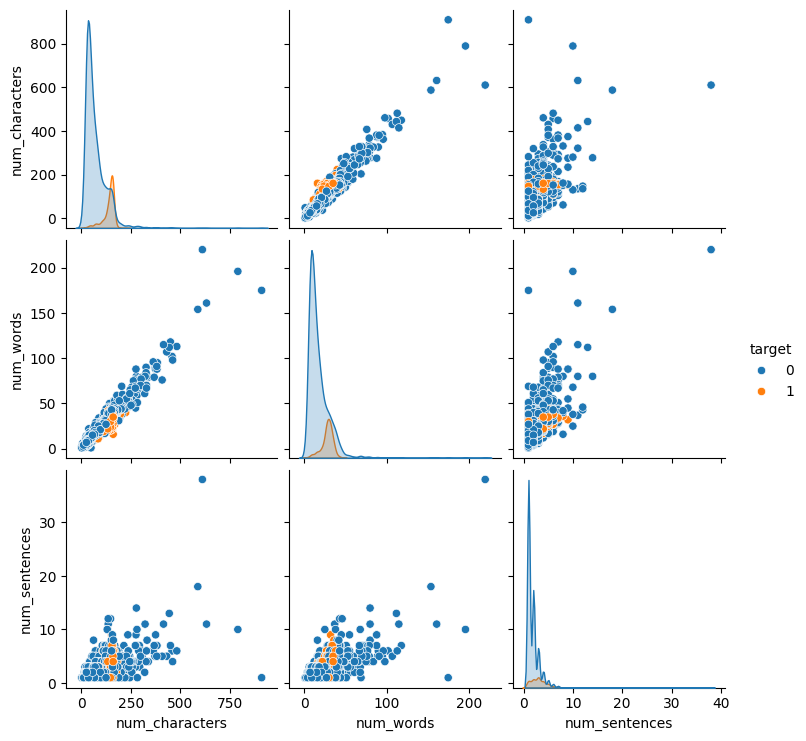

In [28]:
sns.pairplot(df, hue='target')

<Axes: >

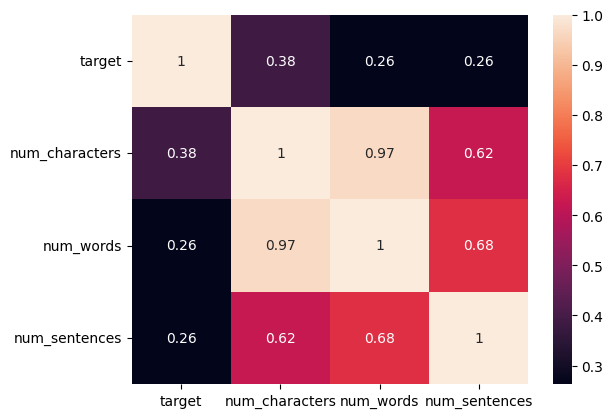

In [29]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation 
- stemming

In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

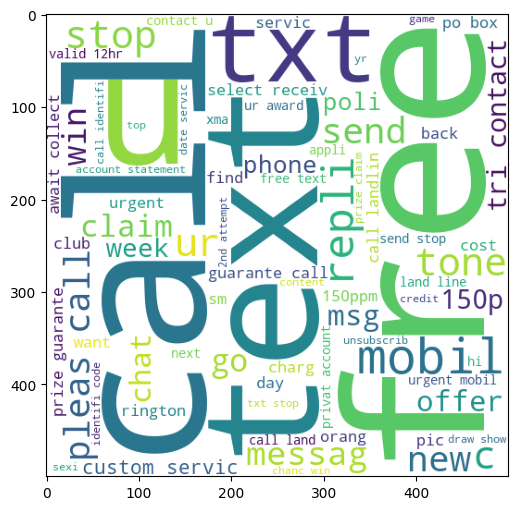

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

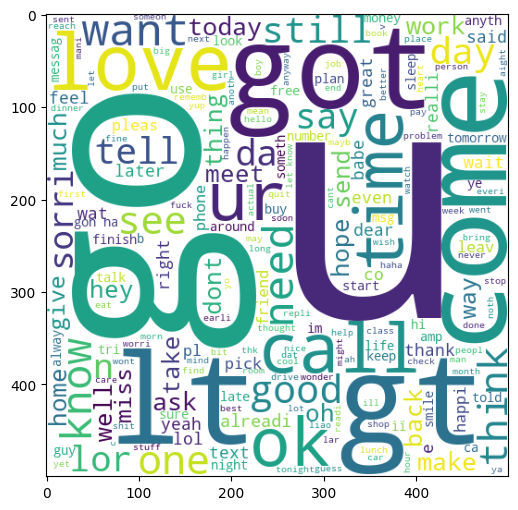

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

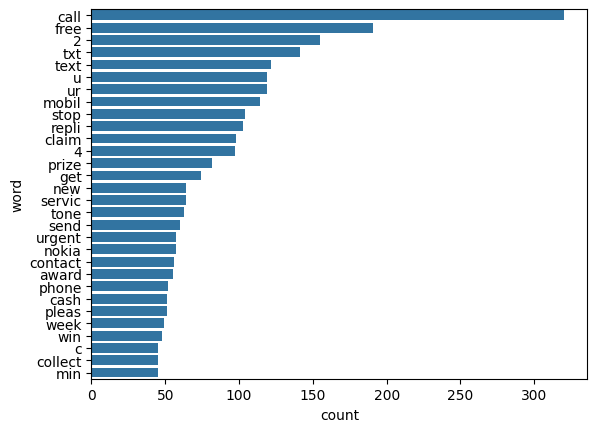

In [43]:
from collections import Counter

# Get the 30 most common words in spam corpus
spam_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using seaborn
sns.barplot(x='count', y='word', data=spam_common_df)
plt.show()

In [44]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

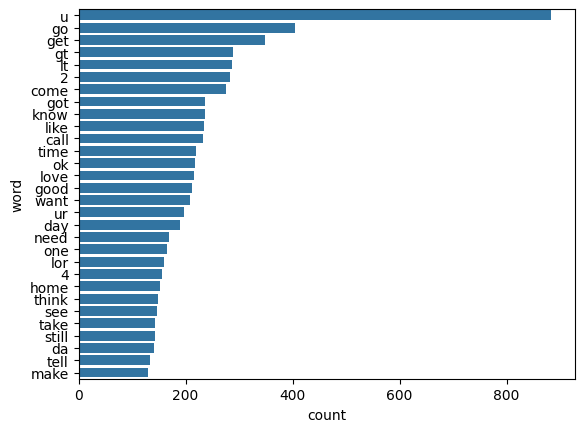

In [46]:
# get the 30 most common words in ham corpus
ham_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# plot using seaborn
sns.barplot(x='count', y='word', data=ham_common_df)
plt.show()

In [47]:
# text vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

X = tfidf.fit_transform(df['transformed_text']).toarray()


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [49]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
# GaussianNB 
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [53]:
# MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [54]:
# BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [55]:
# tfidf --> MultinomialNB

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb   
}

In [59]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [60]:
# example 
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [61]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print('For', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [62]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [63]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')

In [64]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


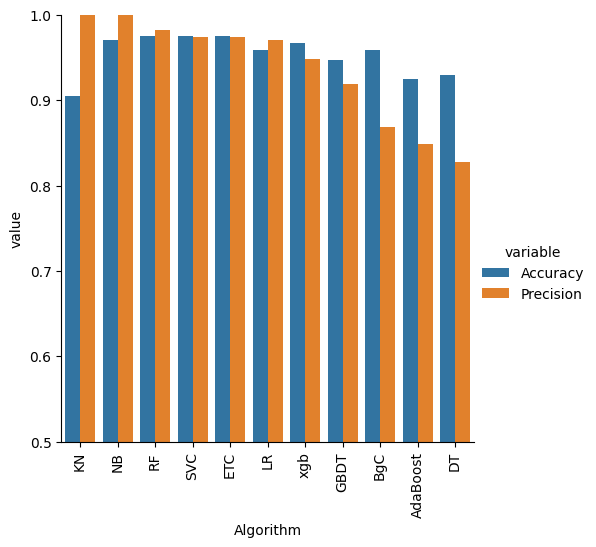

In [65]:
sns.catplot(x= 'Algorithm', y='value', hue= 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation= 'vertical')
plt.show()

In [69]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [72]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))